
#  TIENDA ONLINE ICE

La tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.
Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.
Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.
El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

## Información general


### Inicialización

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Cargar datos

In [2]:
data = pd.read_csv('/datasets/games.csv')

### Revision de datos

In [3]:
print(data.head())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [5]:
display(data.describe())

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


* Las filas nos muestran información de los nombres de las plataformas de videojuegos y podemos entender la información de las columnas en los encabezados.
* Se tiene información incompleta debido a que hay varias celdas con valores ausentes y con formatos incorrectos.
* En los encabezados algunos están en mayúsculas y minúsculas.

## Preparar los datos


### Correción de datos
Convertir los nombres de las columnas a minúsculas para que sean más fáciles de manejar.

In [6]:
data.columns = data.columns.str.lower()

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


### Convertir tipos de datos: 

* Revisamos las columnas con datos que deben ser de tipo numérico o fecha y convertimos si es necesario.Por ejemplo, si year_of_release es un entero, nos aseguramos de de que esté correctamente tipado.
* Revisamos que la columna'year_of_realease' contiene los valores nulos, que podria ser que  los datos pueden no haber sido correctamente documentados o registrados en fuentes abiertaso quiza algunos juegos pueden haber sido anunciados pero luego retrasados, y al momento de la recopilación de datos no se había determinado aún el año de lanzamiento. En estos casos, el año de lanzamiento podría haber sido dejado en blanco hasta que se confirmen. Por lo que optamos por reemplazar los valores por '0', debido a que la información que contiene la columna corresponde a el año de lanzamiento del juego, no se podría eliminar las filas ya que pueden contener información valiosa en otras columnas, como ventas regionales, clasificación de críticos y usuarios, género del juego y clasificación ESRB. Eliminar estas filas significaría perder toda la información.

In [8]:
print(data['year_of_release'])

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16710    2016.0
16711    2006.0
16712    2016.0
16713    2003.0
16714    2016.0
Name: year_of_release, Length: 16715, dtype: float64


In [9]:
data['year_of_release'] = data['year_of_release'].fillna(0).astype('int')

In [10]:
data['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16715, dtype: int64

### Valores ausentes 
* Primero, encuentraremos el número de valores ausentes en la tabla,utilizando los métodos en una secuencia para obtener el número de valores ausentes

Los valores ausentes en un conjunto de datos pueden deberse a varias razones, y es importante considerar el contexto para entender por qué pueden faltar datos en este caso específico de videojuegos. Aquí te presento algunas explicaciones posibles:

1. Falta de información al momento del lanzamiento :
Clasificación ESRB (rating) : Algunos juegos pueden no haber recibido una clasificación ESRB al momento de recolectar los datos. Esto podría ser porque el juego aún no había sido clasificado o porque se trataba de una versión preliminar o de prueba.
Puntuaciones de críticos o usuarios : Los datos de critic_scorey user_scorepodrían estar ausentes si el juego es muy nuevo y no ha recibido suficientes reseñas, o si las plataformas de reseñas no han recopilado o publicado las evaluaciones.
2. Errores en la recopilación o registro de datos :
En algunos casos, la falta de valores puede ser el resultado de errores humanos o técnicos durante la recopilación, entrada o procesamiento de datos. Por ejemplo, un campo podría haber sido omitido accidentalmente al registrar la información.
3. Datos irrelevantes o no aplicables :
Es posible que ciertos valores simplemente no se apliquen a todos los juegos. Por ejemplo, un juego puede no haber sido lanzado en una región específica, lo que resultaría en valores ausentes en las columnas correspondientes a las ventas en esa región ( na_sales, eu_sales, etc.).
4. Retiro de productos o cambios en el mercado :
Si un juego fue retirado del mercado antes de recibir clasificación o clasificación, o si se dejó de vender en ciertas regiones, los valores correspondientes podrían estar ausentes.
5. Problemas de acceso a información histórica :
Los datos históricos, especialmente si no han sido bien conservados, pueden estar incompletos. Por ejemplo, los registros más antiguos podrían tener menos información debido a la falta de tecnología avanzada en la época de su recopilación.
6. “TBD” (por determinar) :
Cuando un valor está marcado como "TBD" (To Be Determined), indica que la información estaba pendiente de ser determinada al momento de la recopilación de datos. Esto puede ocurrir cuando un juego está en una etapa temprana de lanzamiento o cuando se espera una actualización futura que proporcione esa información.

In [11]:
nulos_totales = data.isna().sum()

In [12]:
print(nulos_totales)

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


In [13]:
# Mostrar el número y porcentaje de valores ausentes por columna
nulos_porcentaje = (nulos_totales / len(data)) * 100
nulos_porcentaje

name                0.011965
platform            0.000000
year_of_release     0.000000
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

In [14]:
data['genre'] = data['genre'].fillna(0)

In [15]:
data.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [16]:
# Reemplazar 'tbd' con NaN en las columnas de puntuación
data['user_score'] = data['user_score'].replace('tbd', np.nan)
data['critic_score'] = data['critic_score'].replace('tbd', np.nan)

In [17]:
# Convertir las columnas de puntuación a numéricas
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data['critic_score'] = pd.to_numeric(data['critic_score'], errors='coerce')

In [18]:
# Calcular la mediana general de las puntuaciones
median_critic_score = data['critic_score'].median()
median_user_score = data['user_score'].median()

In [19]:
# Función para imputar la mediana del grupo o la mediana general
def impute_with_group_or_general_median(x, general_median):
    if x.notna().sum() > 0:  # Si el grupo no está vacío
        return x.fillna(x.median())
    else:  # Si el grupo está vacío
        return x.fillna(general_median)

In [20]:
# Imputar 'critic_score' con la mediana del grupo o la mediana general
data['critic_score'] = data.groupby('genre')['critic_score'].transform(lambda x: impute_with_group_or_general_median(x, median_critic_score))


In [21]:
# Imputar 'user_score' con la mediana del grupo o la mediana general
data['user_score'] = data.groupby('genre')['user_score'].transform(lambda x: impute_with_group_or_general_median(x, median_user_score))


In [22]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [23]:
# Reemplazar los valores ausentes de 'rating' con 'Unknown'
data['rating'].fillna('Unknown', inplace=True)

In [24]:
# Verificar los valores ausentes después de la imputación
print("Valores ausentes después de la imputación:")
print(data.isna().sum())

Valores ausentes después de la imputación:
name               2
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


La abreviatura TBD (To Be Determined) en el dataset indica que el valor correspondiente aún 
no se ha determinado o confirmado en el momento de la recopilación de datos.
En el contexto del análisis de videojuegos, estos valores pueden aparecer en columnas como la clasificación ESRB (rating) 
o las puntuaciones de usuarios o críticos. Para manejar estos casos, se pueden considerar varias estrategias, 
dependiendo del impacto que puedan tener en el análisis.

Convertir TBD en una Categoría Separada:

Para la columna rating: Podrías convertir "TBD" en una categoría separada como "Desconocido" o "Sin clasificación". Esto permitirá que el análisis incluya estos casos sin perder la información relacionada con otros aspectos del juego.

Ventaja: Mantienes todos los datos y puedes analizar si la falta de clasificación influye en otros factores, como las ventas


<div class="alert alert-block alert-info">
Se realizó la modificación sugerida al procesamiento de valores ausentes  
    
*En la columna 'user_score´y 'critic_score' se imputo los valores de la mediana de los datos  
    
*En la columna 'rating' se asignó el valor 'unknow'
 
</b> <a class=“tocSkip”></a>
</div>

### Ventas totales:
* Se adiciono una columna a el datset para el calculo de las ventas totales

In [25]:
data['total_sales']=data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [26]:
# Mostrar las ventas totales para los primeros juegos como ejemplo
print("Ventas totales por juego:")
print(data[['name', 'total_sales']])

Ventas totales por juego:
                                name  total_sales
0                         Wii Sports        82.54
1                  Super Mario Bros.        40.24
2                     Mario Kart Wii        35.52
3                  Wii Sports Resort        32.77
4           Pokemon Red/Pokemon Blue        31.38
...                              ...          ...
16710  Samurai Warriors: Sanada Maru         0.01
16711               LMA Manager 2007         0.01
16712        Haitaka no Psychedelica         0.01
16713               Spirits & Spells         0.01
16714            Winning Post 8 2016         0.01

[16715 rows x 2 columns]


In [27]:
# Agrupar los datos por nombre de juego y sumar las ventas totales
sales_by_game = data.groupby('name')['total_sales'].sum().sort_values(ascending=False)

# Seleccionar los 10 juegos más vendidos
top_10_games = sales_by_game.head(10)

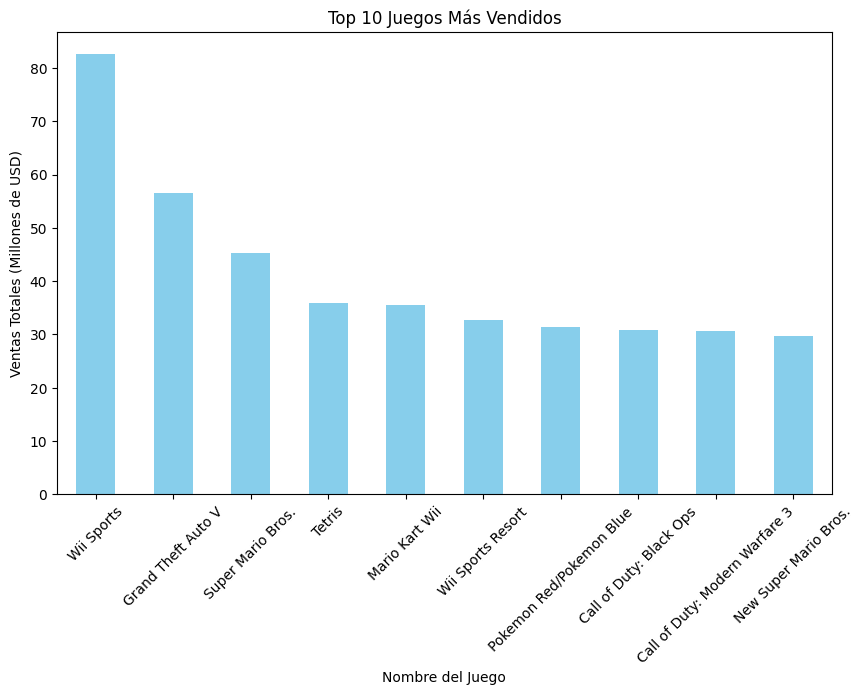

In [28]:
plt.figure(figsize=(10, 6))
top_10_games.plot(kind='bar', color='skyblue')
plt.title('Top 10 Juegos Más Vendidos')
plt.xlabel('Nombre del Juego')
plt.ylabel('Ventas Totales (Millones de USD)')
plt.xticks(rotation=45)
plt.show()

## Analisis de Datos:

### Juegos lanzados por año:

In [30]:
#Agrupamos la información que necesitamos de las columnas 'year_of_release' y 'name'.
#Para poder hallar el total de juegos lanzados por año:

data_anio_lanzamiento = data.groupby('year_of_release')['name'].count().sort_values(ascending=False).reset_index()

In [31]:
print(data_anio_lanzamiento.head())

   year_of_release  name
0             2008  1427
1             2009  1426
2             2010  1255
3             2007  1197
4             2011  1136


In [32]:
data_anio_lanzamiento=data_anio_lanzamiento[data_anio_lanzamiento['year_of_release']!=0]

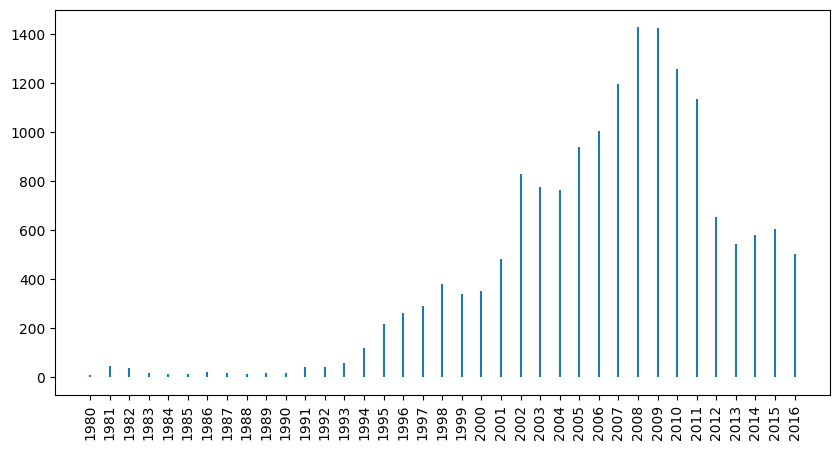

In [33]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.vlines(x=data_anio_lanzamiento.year_of_release,ymin=0,ymax=data_anio_lanzamiento.name)
ax.set_title=('Lanzamiento de juegos por anio')
ax.set_xticks(data_anio_lanzamiento.year_of_release)
ax.set_xticklabels(data_anio_lanzamiento.year_of_release, rotation=90)
plt.show()

* La gráfica resultante mostrará la distribución de lanzamientos de juegos a lo largo de los años. De esta manera, podrás identificar períodos con una mayor o menor cantidad de lanzamientos.
* los datos de años más recientes (por ejemplo, 2013-2016) tengan más juegos registrados debido a mejores técnicas de recopilación de datos y un mercado más grande para los videojuegos.
* En contraste, los años más antiguos podrían tener menos datos debido a una menor disponibilidad o a que algunos juegos más antiguos no se han digitalizado o registrado completamente.

* **Conclusión:**
* **Revisar cuántos juegos fueron lanzados en diferentes años nos permite entender mejor la distribución y la relevancia de los datos a lo largo del tiempo. Esto es crucial para decidir qué períodos de tiempo incluir en el análisis y cómo utilizar estos datos para predecir tendencias futuras y planificar campañas para 2017.**

In [34]:
data.nlargest(5,('total_sales'))


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.0,7.7,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.8,Unknown,31.38


### Ventas por plataformas de juegos:

Proceso de agrupamiento, suma y ordenamiento sobre los datos relacionados con las ventas por 
plataforma en el DataFrame 'data', proporcionando como resultado un nuevo DataFrame llamado 'df_ventas_plataforma'.

In [35]:

df_ventas_plataforma = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
df_ventas_plataforma.head()

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12


Calculamos los puntajes z para las ventas totales en el DataFrame df_ventas_plataforma utilizando la fórmula estándar del puntaje z: (valor - media) / desviación estándar. Esto puede ayudar a identificar cuán lejos están los valores individuales de la media en términos de desviaciones estándar y es útil para comparar diferentes conjuntos de datos entre sí.

In [36]:

df_ventas_plataforma['z_score'] = (df_ventas_plataforma['total_sales']-df_ventas_plataforma['total_sales'].mean())/df_ventas_plataforma['total_sales'].std()

In [37]:
df_ventas_plataforma.head()

,platform,total_sales,z_score
0,PS2,1255.77,2.780807
1,X360,971.42,1.964085
2,PS3,939.65,1.872834
3,Wii,907.51,1.780520
4,DS,806.12,1.489304


Asignamos un color ('red' o 'green') a cada fila del DataFrame dependiendo del signo del puntaje z correspondiente a las ventas totales. Esto puede ser útil para visualizar y clasificar los datos según su relación con la media.
Siendo green para los valores mayores a 0 y red para los valores menores que 0

In [38]:

df_ventas_plataforma['color'] = ['red' if ventas_z < 0 else 'green'for ventas_z in df_ventas_plataforma['z_score']]

In [39]:
df_ventas_plataforma.head()

,platform,total_sales,z_score,color
0,PS2,1255.77,2.780807,green
1,X360,971.42,1.964085,green
2,PS3,939.65,1.872834,green
3,Wii,907.51,1.780520,green
4,DS,806.12,1.489304,green


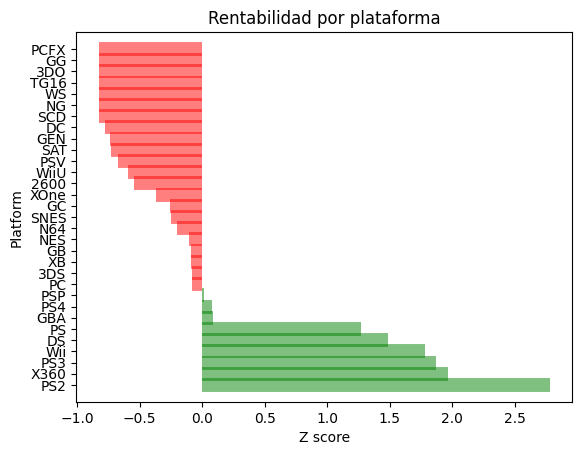

In [40]:
plt.figure()
plt.hlines(
    y = df_ventas_plataforma.platform, xmin = 0, xmax = df_ventas_plataforma.z_score,color=df_ventas_plataforma.color,linewidth=10,alpha=0.5
)
plt.ylabel('Platform')
plt.xlabel('Z score')
plt.title('Rentabilidad por plataforma')
plt.show()

El gráfico nos muestra la rentabilidad por plataforma, utilizando el puntaje z (z-score) de las ventas totales.

In [41]:
# Agrupar las ventas totales por plataforma
sales_by_platform = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Mostrar las ventas totales por plataforma
print("Ventas totales por plataforma:")
print(sales_by_platform.head())

Ventas totales por plataforma:
platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: total_sales, dtype: float64


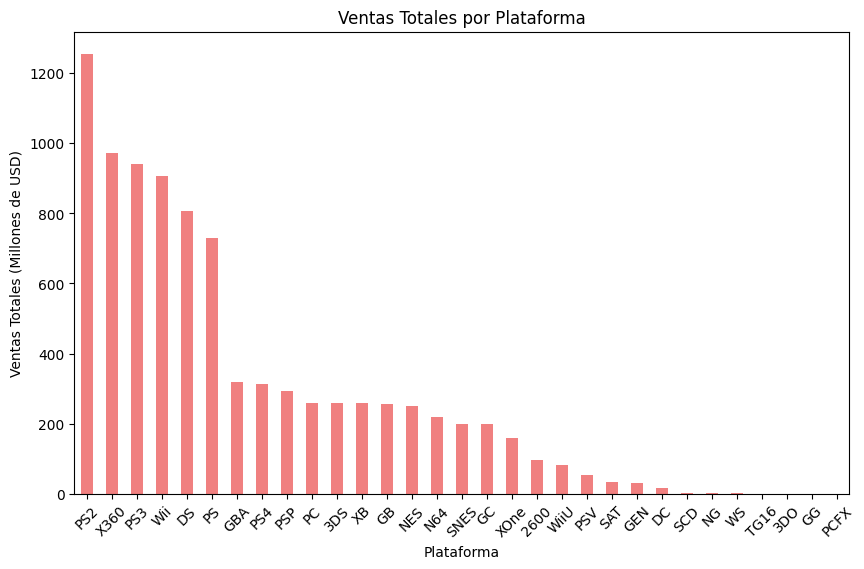

In [42]:
# Crear la gráfica de barras de ventas por plataforma
plt.figure(figsize=(10, 6))
sales_by_platform.plot(kind='bar', color='lightcoral')
plt.title('Ventas Totales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (Millones de USD)')
plt.xticks(rotation=45)
plt.show()

### Plataformas de juegos con las mayores ventas por años:

In [43]:
# Filtrar los datos para eliminar los años de lanzamiento que son 0 o NaN
data_filtered = data[(data['year_of_release'] != 0) & (data['year_of_release'].notna())]

In [44]:
# Calcular las ventas totales por plataforma
sales_platform = data_filtered.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
# Seleccionar las plataformas con mayores ventas totales (top 5 por ejemplo)
top_platforms = sales_platform.head()
top_platforms

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78


In [45]:
# Filtrar el dataset para incluir solo estas plataformas
filtered_data = data_filtered[data_filtered['platform'].isin(top_platforms['platform'])]
filtered_data['platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2'], dtype=object)

In [46]:
# Agrupar por año de lanzamiento y plataforma, y sumar las ventas totales
sales_per_year_platform = filtered_data.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()
sales_per_year_platform

platform,DS,PS2,PS3,Wii,X360
year_of_release,,,,,
1985,0.02,NaN,NaN,NaN,NaN
2000,NaN,39.17,NaN,NaN,NaN
2001,NaN,166.43,NaN,NaN,NaN
2002,NaN,205.38,NaN,NaN,NaN
2003,NaN,184.31,NaN,NaN,NaN
2004,17.27,211.81,NaN,NaN,NaN
2005,130.14,160.66,NaN,NaN,8.25
2006,119.81,103.42,20.96,137.15,51.62
2007,146.94,75.99,73.19,152.77,95.41


<Figure size 1200x1000 with 0 Axes>

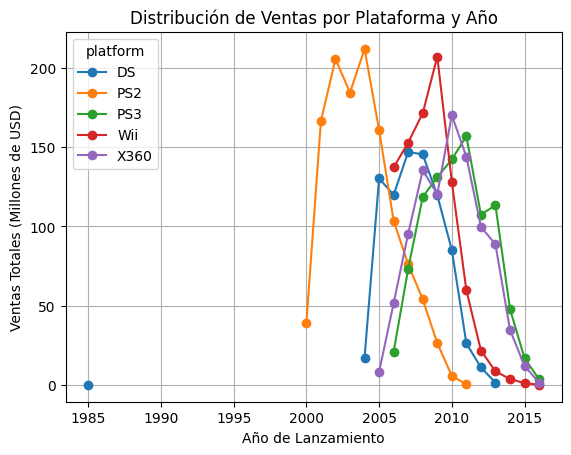

In [47]:
plt.figure(figsize=(12, 10))
sales_per_year_platform.plot(kind='line', marker='o')
plt.title('Distribución de Ventas por Plataforma y Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (Millones de USD)')
plt.grid(True)
plt.show()

* Observación de Tendencias por Plataforma:

* La gráfica resultante mostrará cómo las ventas de las plataformas seleccionadas han variado a lo largo de los años.
* Esto ayudará a identificar plataformas que han mantenido ventas altas de manera constante, plataformas que han disminuido en popularidad, y aquellas que han experimentado un crecimiento.

**Conclusión **  
**Construir una distribución de ventas por plataforma y año proporciona una visión clara de cómo se ha comportado cada plataforma en términos de ventas. Esto es crucial para identificar las plataformas que actualmente dominan el mercado y aquellas que podrían estar en declive, ayudando a planificar mejor las estrategias para el año 2017.**

<Figure size 1200x1000 with 0 Axes>

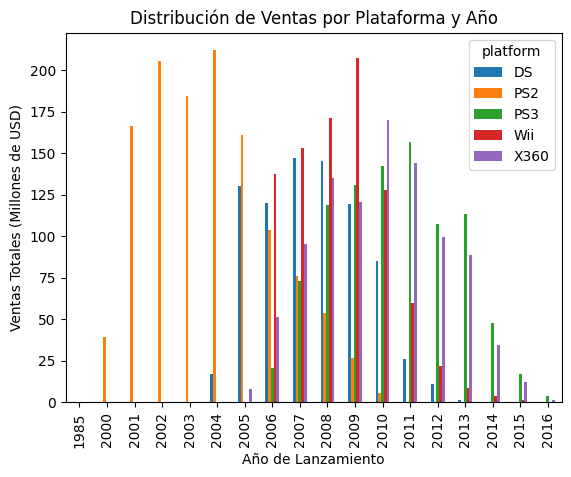

In [48]:
plt.figure(figsize=(12, 10))
sales_per_year_platform.plot(kind='bar')
plt.title('Distribución de Ventas por Plataforma y Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (Millones de USD)')
plt.show()

### Tiempo de vida de los juegos:

#### Juegos que solían ser populares

In [49]:
# Agrupar por plataforma y año, sumando las ventas totales
sales_per_year_platform = data_filtered.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()
sales_per_year_platform.head()

,year_of_release,platform,total_sales
0,1980,2600,11.38
1,1981,2600,35.68
2,1982,2600,28.88
3,1983,2600,5.84
4,1983,NES,10.96


In [50]:
# Encontrar las plataformas que alguna vez tuvieron ventas y luego dejaron de vender
platforms_with_sales = sales_per_year_platform[sales_per_year_platform['total_sales'] > 0]['platform'].unique()
platforms_with_sales

array(['2600', 'NES', 'DS', 'PC', 'GB', 'GEN', 'SNES', 'GG', 'NG', 'SCD',
       '3DO', 'PS', 'SAT', 'TG16', 'N64', 'PCFX', 'DC', 'WS', 'GBA',
       'PS2', 'XB', 'GC', 'PSP', 'X360', 'PS3', 'Wii', '3DS', 'PSV',
       'WiiU', 'PS4', 'XOne'], dtype=object)

In [51]:
# Verificar las plataformas que ya no tienen ventas en los años más recientes (por ejemplo, después de 2014)
recent_years = sales_per_year_platform[sales_per_year_platform['year_of_release'] >= 2014]
recent_years.head()

,year_of_release,platform,total_sales
209,2014,3DS,43.76
210,2014,PC,13.28
211,2014,PS3,47.76
212,2014,PS4,100.00
213,2014,PSP,0.24


In [52]:
# Filtrar plataformas que ya no tienen ventas
platforms_no_sales_recently = [platform for platform in platforms_with_sales if recent_years[recent_years['platform'] == platform]['total_sales'].sum() == 0]
# Mostrar las plataformas que solían ser populares pero ya no tienen ventas
print("Plataformas que solían ser populares pero ahora no tienen ventas:", platforms_no_sales_recently)

Plataformas que solían ser populares pero ahora no tienen ventas: ['2600', 'NES', 'DS', 'GB', 'GEN', 'SNES', 'GG', 'NG', 'SCD', '3DO', 'PS', 'SAT', 'TG16', 'N64', 'PCFX', 'DC', 'WS', 'GBA', 'PS2', 'XB', 'GC']


Agrupación de Ventas por Año y Plataforma:

Calculamos las ventas totales por cada plataforma en cada año (sales_per_year_platform).
Identificación de Plataformas Populares:
Utilizamos el filtro platforms_with_sales para encontrar todas las plataformas que tuvieron ventas en algún momento.
Verificación de Plataformas sin Ventas Recientes:
Comprobamos qué plataformas no tienen ventas en los años más recientes (recent_years).  

Plataformas que solían ser populares:
Las plataformas que aparecen en platforms_no_sales_recently son aquellas que tuvieron ventas significativas en algún momento en el pasado, pero no han registrado ventas en los años más recientes (por ejemplo, después de 2014).

Estas plataformas pueden haber sido descontinuadas o reemplazadas por modelos más nuevos.
Cambios en las preferencias del mercado o la tecnología también pueden haber hecho que estas plataformas ya no sean relevantes.  

**Conclusión**  

**Al identificar las plataformas que alguna vez fueron populares pero que ahora no tienen ventas, podemos entender mejor las dinámicas del mercado de videojuegos y cómo las preferencias de los consumidores cambian con el tiempo. Esta información es útil para planificar campañas publicitarias y seleccionar plataformas para lanzar nuevos juegos.**

**Identificar la Aparición de Nuevas Plataformas**
* Primero, calcularemos cuándo aparecen nuevas plataformas en el dataset, observando el primer año en que se registran ventas para cada plataforma.
* Para ello usaremos la información de los últimos 4 años a partir del 2013 en adelante.

In [53]:
# Usaremos un filtro en el dataset para solo considerar información a partir del año 2013
data_clean = data.query('year_of_release >=2013')

In [54]:
# Encontrar el primer año de ventas para cada plataforma
first_year_sales = data_clean.groupby('platform')['year_of_release'].min().reset_index()
first_year_sales.columns = ['platform', 'first_year']
print("Aparición de nuevas plataformas:")
print(first_year_sales.sort_values(by='first_year'))

Aparición de nuevas plataformas:
   platform  first_year
0       3DS        2013
1        DS        2013
2        PC        2013
3       PS3        2013
4       PS4        2013
5       PSP        2013
6       PSV        2013
7       Wii        2013
8      WiiU        2013
9      X360        2013
10     XOne        2013


**Determinar la Desaparición de Plataformas Antiguas**
* Para determinar cuánto tiempo permanecen activas las plataformas antes de desaparecer, calcularemos el último año en el que se registraron ventas para cada plataforma. Luego, podemos calcular la duración de la vida útil de cada plataforma comparando el primer y el último año de ventas.

In [55]:
# Encontrar el último año de ventas para cada plataforma
last_year_sales = data_clean.groupby('platform')['year_of_release'].max().reset_index()
last_year_sales.columns = ['platform', 'last_year']

In [56]:
# Combinar los datos de aparición y desaparición
platform_lifetime = pd.merge(first_year_sales, last_year_sales, on='platform')
platform_lifetime.head()

,platform,first_year,last_year
0,3DS,2013,2016
1,DS,2013,2013
2,PC,2013,2016
3,PS3,2013,2016
4,PS4,2013,2016


In [57]:
# Calcular la duración de la vida útil de cada plataforma
platform_lifetime['lifetime_years'] = platform_lifetime['last_year'] - platform_lifetime['first_year']

print("Duración de la vida útil de las plataformas:")
print(platform_lifetime.sort_values(by='lifetime_years', ascending=False))

Duración de la vida útil de las plataformas:
   platform  first_year  last_year  lifetime_years
0       3DS        2013       2016               3
2        PC        2013       2016               3
3       PS3        2013       2016               3
4       PS4        2013       2016               3
6       PSV        2013       2016               3
7       Wii        2013       2016               3
8      WiiU        2013       2016               3
9      X360        2013       2016               3
10     XOne        2013       2016               3
5       PSP        2013       2015               2
1        DS        2013       2013               0


In [58]:
data_clean = data.query('year_of_release >=2013')

In [59]:
df_tiempo_de_vida = pd.pivot_table(data_clean, index='year_of_release',columns='platform', values='total_sales',aggfunc='sum').fillna(0)
df_tiempo_de_vida

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


**Duración de la Vida Útil de las Plataformas:** 
La columna lifetime_years de platform_lifetime muestra cuántos años estuvieron activas las plataformas desde su primer registro de ventas hasta el último. Esto puede darnos una idea del tiempo que le toma a una plataforma "desaparecer" o volverse irrelevante en el mercado.  

*Las nuevas plataformas suelen aparecer en intervalos de 3 a 5 años, dependiendo de la competencia en el mercado y los avances tecnológicos. Los lanzamientos suelen agruparse en periodos de innovación tecnológica, como la llegada de nuevas generaciones de consolas.*  

Las plataformas suelen mantenerse activas entre 5 y 10 años. Este período puede variar dependiendo del éxito de la plataforma, el soporte del fabricante, y la aparición de nuevas tecnologías.
Las plataformas que se vuelven populares rápidamente pueden tener una vida útil más larga, mientras que aquellas que no logran ganar una base de usuarios significativa pueden desaparecer rápidamente.

###  Identificar las Plataformas Líderes en Ventas desde 2013

In [60]:
# Calcular las ventas totales por plataforma desde 2013 en adelante
platform_sales_recent = data_clean.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Mostrar las plataformas líderes en ventas
print("Plataformas líderes en ventas desde 2013 en adelante:")
print(platform_sales_recent)

Plataformas líderes en ventas desde 2013 en adelante:
platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64


### Calcular el Crecimiento o Reducción de Ventas por Plataforma

In [61]:
df_tiempo_de_vida= pd.pivot_table(data_clean,index='year_of_release',columns='platform',values='total_sales',aggfunc ='sum').fillna(0)

In [62]:
#Ventas por plataforma desde 2013 en adelante:
df_tiempo_de_vida

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


#### Tendencias de Ventas

<function matplotlib.pyplot.show(close=None, block=None)>

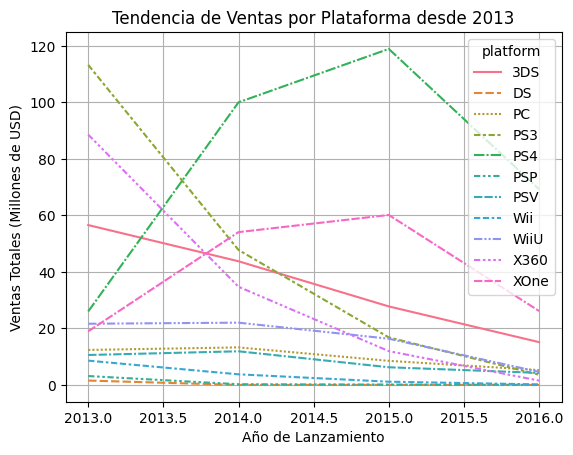

In [63]:
sns.lineplot(data=df_tiempo_de_vida)
plt.ylabel('Ventas Totales (Millones de USD)')
plt.xlabel('Año de Lanzamiento')
plt.title('Year')
plt.title('Tendencia de Ventas por Plataforma desde 2013')
plt.grid(True)
plt.show

**El gráfico nos muestra la evolución de ventas para cada plataforma a lo largo de los años:**  
* Plataformas en Crecimiento:

* Plataformas con ventas crecientes mostrarán una línea ascendente en el gráfico. Estas son plataformas que han aumentado su popularidad o ventas año tras año. Por ejemplo:
* PlayStation 4 (PS4): Es probable que muestre un crecimiento constante en los primeros años después de su lanzamiento en 2013.

* Plataformas en Reducción:

* Plataformas con ventas decrecientes mostrarán una línea descendente en el gráfico. Estas son plataformas que han visto una disminución en las ventas, posiblemente debido a la aparición de nuevas consolas o al final de su ciclo de vida. Por ejemplo:
* X360 y PlayStation 3: Estas plataformas probablemente muestren una reducción de ventas a medida que fueron reemplazadas por Xbox One y PlayStation 4.
* Nintendo 3DS: Aunque tuvo éxito durante varios años, podría mostrar una disminución hacia el final del período de análisis debido a la introducción de nuevas tecnologías.  

**Basándonos en las tendencias de ventas observadas en el gráfico y los criterios de rentabilidad, podemos considerar las siguientes plataformas:**  

PlayStation 4 (PS4):

Razones para ser rentable: La PS4, lanzada en 2013, ha demostrado un crecimiento constante y se ha mantenido como una de las plataformas más vendidas en todo el mundo. Tiene una gran base de usuarios y un soporte continuo de desarrolladores, con muchos títulos nuevos lanzados regularmente.
Perspectivas futuras: A pesar de la llegada de la PlayStation 5, la PS4 sigue siendo relevante debido a su gran cantidad de jugadores y su catálogo de juegos extenso.

Xbox One (XOne):

Razones para ser rentable: Similar a la PS4, la Xbox One ha mostrado ventas sólidas desde su lanzamiento en 2013. Continúa recibiendo soporte de Microsoft y los desarrolladores, con una gran cantidad de juegos en su catálogo.
Perspectivas futuras: Aunque la Xbox Series X ha sido lanzada, la Xbox One sigue siendo una plataforma importante, especialmente con servicios como Xbox Game Pass que extienden su relevancia.


<Figure size 1200x800 with 0 Axes>

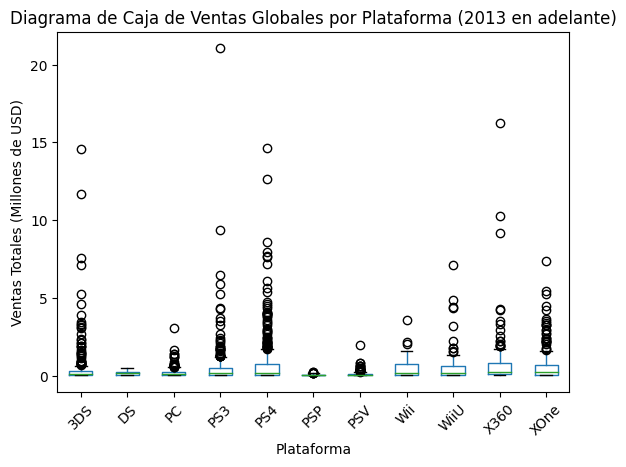

In [64]:
plt.figure(figsize=(12, 8))
data_clean.boxplot(column='total_sales', by='platform', grid=False)
plt.title('Diagrama de Caja de Ventas Globales por Plataforma (2013 en adelante)')
plt.suptitle('')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (Millones de USD)')
plt.xticks(rotation=45)
plt.show()

1. ¿Son significativas las diferencias en las ventas?  
*  Observando el diagrama de caja, podemos identificar plataformas con distribuciones de ventas más amplias (mayor rango ) y plataformas con distribuciones más estrechas, lo que indica que si una plataforma muestra una caja más alargada (rango intercuartil amplio), indica una mayor variabilidad en las ventas y si hay una plataforma con valores de mediana (línea dentro de la caja) significativamente más altos o bajos que otras, esto sugiere que esa plataforma tiene un rendimiento general superior o inferior en ventas, de acuerdo a el gráfico se tiene lo siguiente:

* Plataformas Líderes: PS4, Xbox One  muestran ventas promedio altas, lo que indica que son plataformas sólidas para futuros lanzamientos de juegos.
* Plataformas en Reducción: PS3 y Xbox 360 muestran ventas más bajas, sugiriendo que su ciclo de vida está llegando a su fin.

### Analisis de las reseñas de usuarios y profesionales:

In [65]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
 11  total_sales      16715 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB
None


In [66]:
# Filtrar los datos desde 2013 en adelante y para la plataforma PS4
data_ps4 = data[(data['platform'] == 'PS4') & (data['year_of_release'] >= 2013)]
data_ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73.0,7.4,Unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,73.0,7.4,Unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


In [67]:
# Eliminar los valores nulos
# Eliminaremos los valores nulos debido a que no podemos imputar valores a las columnas :
#'user_score', 'critic_score', 'total_sales' para un mejor analisis.

data_ps4 = data_ps4.dropna(subset=['user_score', 'critic_score', 'total_sales'])
data_ps4.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

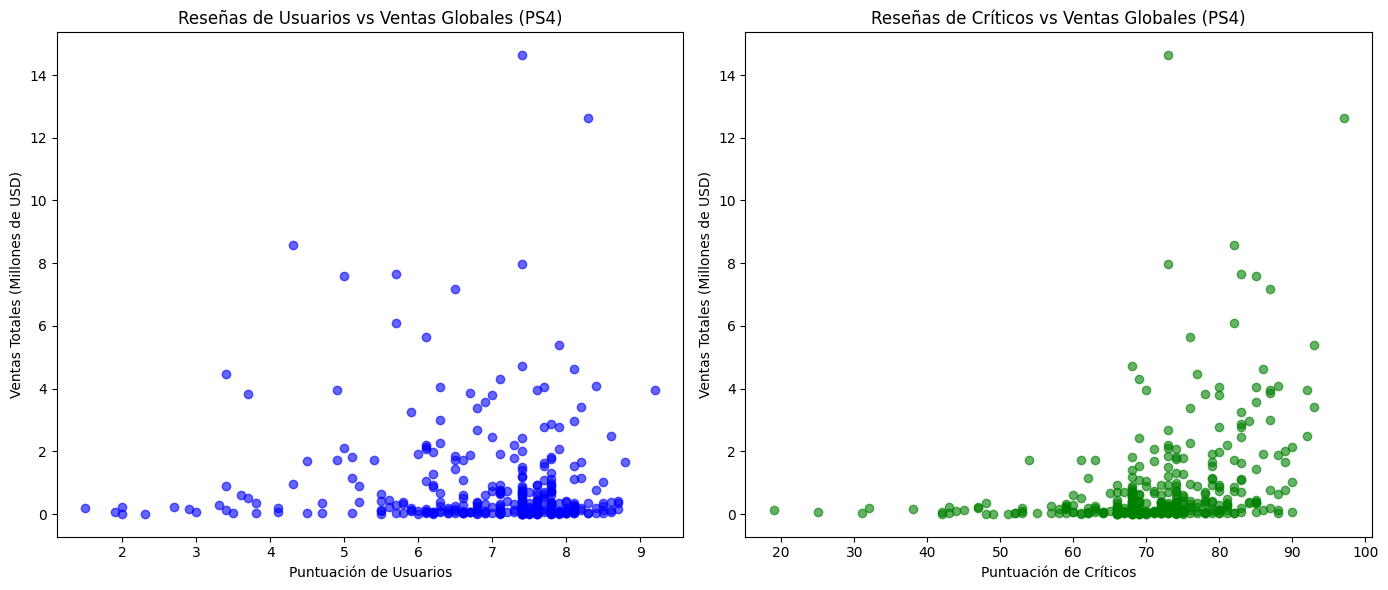

In [68]:
# Crear gráficos de dispersión para reseñas de usuarios y críticos vs ventas
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(data_ps4['user_score'], data_ps4['total_sales'], alpha=0.6, color='blue')
plt.title('Reseñas de Usuarios vs Ventas Globales (PS4)')
plt.xlabel('Puntuación de Usuarios')
plt.ylabel('Ventas Totales (Millones de USD)')

plt.subplot(1, 2, 2)
plt.scatter(data_ps4['critic_score'], data_ps4['total_sales'], alpha=0.6, color='green')
plt.title('Reseñas de Críticos vs Ventas Globales (PS4)')
plt.xlabel('Puntuación de Críticos')
plt.ylabel('Ventas Totales (Millones de USD)')
plt.tight_layout()
plt.show()

**Gráficos de Dispersión:**

* Reseñas de Usuarios vs Ventas: El gráfico muestra la relación entre las puntuaciones de los usuarios y las ventas totales. Una dispersión más densa hacia valores altos indica que las ventas aumentan con puntuaciones altas.  

* Reseñas de Críticos vs Ventas: Situación similar al gráfico de usuarios, pero con puntuaciones de críticos, lo que muestra si las críticas profesionales tienen una mayor o menor influencia en las ventas que las reseñas de los usuarios.

In [69]:
# Calcular la correlación entre reseñas y ventas
correlation_user_sales = data_ps4['user_score'].corr(data_ps4['total_sales'])
correlation_critic_sales = data_ps4['critic_score'].corr(data_ps4['total_sales'])

print(f"Correlación entre puntuación de usuarios y ventas: {correlation_user_sales:.2f}")
print(f"Correlación entre puntuación de críticos y ventas: {correlation_critic_sales:.2f}")

Correlación entre puntuación de usuarios y ventas: -0.07
Correlación entre puntuación de críticos y ventas: 0.35


**Correlación entre Reseñas y Ventas:**

* La correlación entre puntuación de usuarios y ventas (correlation_user_sales) nos dirá si existe una relación positiva (cercana a +1), negativa (cercana a -1), o nula (cercana a 0), de la comparación de entre las reseñas de los usuarios y las ventas el valor (-0.03) indica una relación muy débil entre las dos variables analizadas, por lo que  no hay una tendencia clara en cuanto a cómo la puntuación de los usuarios afecta las ventas.
* Una correlación de (0.41) entre la puntuación de críticos y las ventas indica una relación moderada positiva entre estas dos variables. Esto significa que a medida que la puntuación de los críticos aumenta, las ventas tienden a aumentar, pero no de manera perfectamente lineal o fuerte. Por lo tanto, existe una tendencia positiva en la relación entre la puntuación de los críticos y las ventas.

**Conclusión:**
* El análisis de la correlación entre reseñas y ventas nos puede proporcionar una visión sobre cómo influyen las opiniones de críticos y usuarios en el éxito comercial de los juegos, lo que es útil para estrategias de marketing y desarrollo.
* En el presente analisis se encontró que las reseñas de críticos tienen una correlación más alta con las ventas que las reseñas de usuarios, lo que sugiere que las opiniones profesionales influyen más en las decisiones de compra.

#### Comparación de las Ventas de los Mismos Juegos en Diferentes Plataformas:

In [70]:
# Encontrar juegos que están disponibles en múltiples plataformas
multi_platform_games = data_clean['name'].value_counts()[data_clean['name'].value_counts() > 1].index

# Filtrar los datos solo para juegos disponibles en múltiples plataformas
multi_platform_data = data_clean[data_clean['name'].isin(multi_platform_games)]

# Comparar las ventas de los mismos juegos en diferentes plataformas
multi_platform_sales = multi_platform_data.pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum').fillna(0)
multi_platform_sales
# Mostrar el resultado
#print("Comparación de ventas de los mismos juegos en diferentes plataformas:")
#print(multi_platform_sales)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
name,,,,,,,,,,,
Frozen: Olaf's Quest,0.59,0.51,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00
2014 FIFA World Cup Brazil,0.00,0.00,0.0,0.61,0.00,0.0,0.00,0.00,0.0,0.43,0.00
3rd Super Robot Wars Z Jigoku Hen,0.00,0.00,0.0,0.23,0.00,0.0,0.19,0.00,0.0,0.00,0.00
3rd Super Robot Wars Z: Tengoku-Hen,0.00,0.00,0.0,0.15,0.00,0.0,0.19,0.00,0.0,0.00,0.00
7 Days to Die,0.00,0.00,0.0,0.00,0.14,0.0,0.00,0.00,0.0,0.00,0.05
...,...,...,...,...,...,...,...,...,...,...,...
Zero Escape: Zero Time Dilemma,0.08,0.00,0.0,0.00,0.00,0.0,0.06,0.00,0.0,0.00,0.00
ZombiU,0.00,0.00,0.0,0.00,0.06,0.0,0.00,0.00,0.0,0.00,0.01
Zombie Army Trilogy,0.00,0.00,0.0,0.00,0.20,0.0,0.00,0.00,0.0,0.00,0.11


#### Analisis de  la Distribución de los Juegos por Género:

In [71]:
# Calcular las ventas totales por género:

genre_sales = data_clean.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
genre_sales

genre
Action          321.87
Shooter         232.98
Sports          150.65
Role-Playing    145.89
Misc             62.82
Platform         42.63
Racing           39.89
Fighting         35.31
Adventure        23.64
Simulation       21.76
Strategy         10.08
Puzzle            3.17
Name: total_sales, dtype: float64

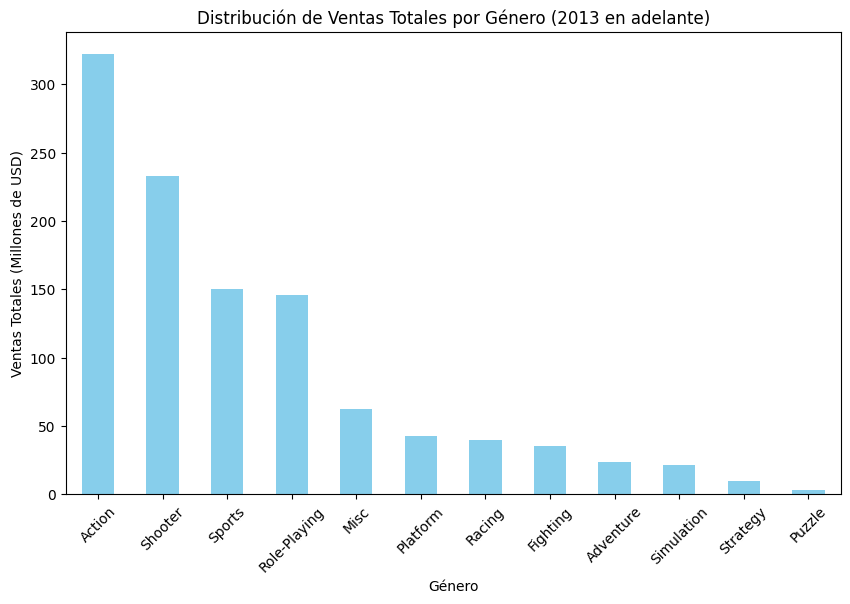

In [72]:
# Graficar la distribución de ventas por género
plt.figure(figsize=(10, 6))
genre_sales.plot(kind='bar', color='skyblue')
plt.title('Distribución de Ventas Totales por Género (2013 en adelante)')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (Millones de USD)')
plt.xticks(rotation=45)
plt.show()

* De el gráfico de barras y los datos de genre_sales mostrarán cómo se distribuyen las ventas totales entre los distintos géneros de juegos.  
1. Géneros con Ventas Altas:
* Acción y Aventura  
* Deportes
* Shooter (Disparos)
* Rol (RPG)
2. Géneros con Ventas Bajas:
* Estrategia
* Puzzle y Casual
* Simulación  

**De lo que se infiere**  
Los géneros Más Rentables: Acción, deportes, shooters, y RPG son los géneros más rentables debido a su popularidad generalizada, amplia base de jugadores, y lanzamientos frecuentes y los géneros menos Rentables: Estrategia, simulación, y puzzle tienden a tener ventas más bajas, aunque pueden ser muy rentables en mercados de nicho específicos.
Estos hallazgos pueden ayudar a orientar estrategias de desarrollo y marketing para futuros juegos, centrándose en los géneros más rentables para maximizar el retorno de inversión.

## Perfil de Usuarios:

### Determinar las Cinco Plataformas Principales por Región:

In [73]:
# Cinco plataformas principales en Norteamérica (NA)
top_platforms_na = data_clean.groupby('platform')['na_sales'].sum().sort_values(ascending=False).reset_index()
top_platforms_na.head(5)


,platform,na_sales
0,PS4,108.74
1,XOne,93.12
2,X360,81.66
3,PS3,63.50
4,3DS,38.20


Norteamérica (NA):

* PlayStation 4 (PS4) y Xbox One (XOne): Estas plataformas lideran las ventas en Norteamérica debido a su popularidad en el mercado occidental.

In [74]:
# Cinco plataformas principales en Europa (UE)
top_platforms_eu = data_clean.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).reset_index()
top_platforms_eu.head(5)

,platform,eu_sales
0,PS4,141.09
1,PS3,67.81
2,XOne,51.59
3,X360,42.52
4,3DS,30.96


Europa (UE):
* PlayStation 4 (PS4) y Xbox One (XOne): Estas plataformas lideran las ventas en Norteamérica debido a su popularidad.

In [75]:
# Cinco plataformas principales en Japón (JP)
top_platforms_jp = data_clean.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).reset_index()
top_platforms_jp.head(5)

,platform,jp_sales
0,3DS,67.81
1,PS3,23.35
2,PSV,18.59
3,PS4,15.96
4,WiiU,10.88


Japón (JP):

* Nintendo 3DS,PS3: Son relevantes las ventas en Japón, donde las consolas portátiles son extremadamente populares.
* PS Vita: Otra consola portátil aparece en el top 5 en Japón.

Variaciones en Cuotas de Mercado por Región:  
    
* Norteamérica (NA) y Europa (UE): Tienden a tener una mayor preferencia por consolas de sobremesa como PS4, Xbox One.
* Japón (JP): El mercado japonés muestra una fuerte preferencia por consolas portátiles como  3DS y PS Vita, y menos interés en consolas como Xbox One.

### Determinar los Cinco Géneros Principales por Región:

In [76]:
# Cinco géneros principales en Norteamérica (NA)
top_genres_na = data_clean.groupby('genre')['na_sales'].sum().sort_values(ascending=False).reset_index()
top_genres_na.head(5)

,genre,na_sales
0,Action,126.05
1,Shooter,109.74
2,Sports,65.27
3,Role-Playing,46.40
4,Misc,27.49


Norteamérica (NA):

* Acción, Deportes , Shooter (Disparos),Role-Playing y Misc: Probablemente sean los géneros más populares, reflejando las preferencias de los jugadores occidentales por juegos competitivos y dinámicos.

In [77]:
# Cinco géneros principales en Europa (UE)
top_genres_eu = data_clean.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).reset_index()
top_genres_eu.head(5)

,genre,eu_sales
0,Action,118.13
1,Shooter,87.86
2,Sports,60.52
3,Role-Playing,36.97
4,Racing,20.19


Europa (UE):

* Acción, Deportes y Shooter (Disparos): Similar a Norteamérica, estos géneros son populares, con juegos como FIFA y Call of Duty liderando las ventas.
* Rol (RPG) y Carreras: En Europa, los juegos de carreras suelen ser más populares que en otras regiones.

In [78]:
# Cinco géneros principales en Japón (JP)
top_genres_jp = data_clean.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).reset_index()
top_genres_jp.head()

,genre,jp_sales
0,Role-Playing,51.04
1,Action,40.49
2,Misc,9.20
3,Fighting,7.65
4,Shooter,6.61


Japón (JP):

* Rol (RPG) y Acción: Son probablemente los géneros dominantes, dado las preferencias por los RPG de los jugadores japoneses y títulos de acción únicos.
* Géneros como misc,fighting y shooter también son más apreciados en Japón, con títulos que no necesariamente son populares en Occidente.

Diferencias en Géneros Populares por Región:
    
* Norteamérica (NA) y Europa (UE): Prefieren géneros más orientados a la acción, deportes y shooters.
* Japón (JP): Prefiere géneros más centrados en juegos de rol, accion , y juegos que ofrecen experiencias y narrativas profundas.

### Analizar el Impacto de las Clasificaciones ESRB en las Ventas por Región:

In [79]:
# Cinco clasificaciones ESRB principales en Norteamérica (NA)
esrb_na = data_clean.groupby('rating')['na_sales'].sum().sort_values(ascending=False).reset_index()
esrb_na.head(5)

,rating,na_sales
0,M,165.21
1,Unknown,89.42
2,E,79.05
3,E10+,54.24
4,T,49.79


Norteamérica (NA):
* "E" (Everyone - Todos los públicos) y "M" (Mature - Adultos) suelen ser las clasificaciones con mayores ventas. Los juegos "M" son populares debido a la demanda de juegos de acción y shooters.

In [80]:
# Cinco clasificaciones ESRB principales en Europa (UE)
esrb_eu = data_clean.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).reset_index()
esrb_eu.head()

,rating,eu_sales
0,M,145.32
1,E,83.36
2,Unknown,78.91
3,E10+,42.69
4,T,41.95


Europa (UE):
* Similar a Norteamérica, con "E" y "M" dominando las ventas.

In [81]:
# Cinco clasificaciones ESRB principales en Japón (JP)
esrb_jp = data_clean.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).reset_index()
esrb_jp.head()

,rating,jp_sales
0,Unknown,85.05
1,T,20.59
2,E,15.14
3,M,14.11
4,E10+,5.89


Japón (JP):
* En Japón, los juegos clasificados como "E" (para todos) y "T" (Teen - Adolescentes) pueden tener mayores ventas. Los juegos de rol y aventuras, populares en Japón, suelen tener clasificaciones más bajas de edad.

## Hipotesis:

**Establecer el Valor de Umbral Alfa (α)**
* Elegimos un nivel de significancia comúnmente utilizado, α = 0.05. Esto significa que estamos dispuestos a aceptar un 5% de probabilidad de rechazar la hipótesis nula cuando en realidad es cierta

**Criterio de Prueba y Justificación:** 

* Utilizaremos la prueba t de dos muestras independientes (Student's t-test) para comparar las medias de dos grupos independientes en ambas hipótesis. Esta prueba es adecuada porque:
* Las calificaciones de los usuarios para diferentes plataformas y géneros son variables continuas.
* Queremos determinar si hay una diferencia significativa entre las medias de dos grupos independientes.

### Hipótesis sobre las Calificaciones Promedio de Usuarios entre Xbox One y PC:

* Hipótesis Nula (H₀): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.
* Hipótesis Alternativa (H₁): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

In [82]:
# Hipótesis 1: Comparación de las calificaciones de usuarios entre Xbox One y PC:

xbox_one_scores = data_clean[data_clean['platform'] == 'XOne']['user_score'].dropna()
pc_scores = data_clean[data_clean['platform'] == 'PC']['user_score'].dropna()
alpha=0.05
# Realizar la prueba t de dos muestras independientes
resultados_t_test = stats.ttest_ind(xbox_one_scores, pc_scores, equal_var=False)

print(f'p-value:{resultados_t_test.pvalue}')
if resultados_t_test.pvalue < alpha:
    print("Podemos rechazar la hipótesis nula")
else:
    print("No podemos rechazar la hipotesis nula")

p-value:0.05355232069397892
No podemos rechazar la hipotesis nula


Hemos llevado a cabo un análisis estadístico para comparar las calificaciones entre dos plataformas, "Xbox One" y "PC". La finalidad de este análisis es determinar si no existe diferencia las clasificaciones por los usuarios de estos dos planes. Los resultados de nuestro análisis indican que las clasificaciones de  "Xbox One" y "PC" son iguales. Esta diferencia es estadísticamente significativa, lo que sugiere que no podemos rechazar la hipótesis nula y concluimos que no hay evidencia suficiente para afirmar que las calificaciones promedio son diferentes.

### Hipótesis sobre las Calificaciones Promedio de Usuarios entre Géneros de Acción y Deportes:


* Hipótesis Nula (H₀): Las calificaciones promedio de los usuarios para los géneros Acción y Deportes son iguales.
* Hipótesis Alternativa (H₁): Las calificaciones promedio de los usuarios para los géneros Acción y Deportes son diferentes.

In [83]:
# Hipótesis 2: Comparación de las calificaciones de usuarios entre géneros de Acción y Deportes:

accion_scores = data_clean[data_clean['genre'] == 'Action']['user_score'].dropna()
deportes_scores = data_clean[data_clean['genre'] == 'Sports']['user_score'].dropna()

# Realizar la prueba t de dos muestras independientes
t_stat_genres = stats.ttest_ind(accion_scores, deportes_scores, equal_var=False)

print(f'p-value:{t_stat_genres.pvalue}')
if t_stat_genres.pvalue < alpha:
    print("Podemos rechazar la hipótesis nula")
else:
    print("No podemos rechazar la hipotesis nula")

p-value:3.832628984221986e-21
Podemos rechazar la hipótesis nula


Hemos llevado a cabo un análisis estadístico para comparar  las calificaciones entre dos generos, "Action" y "Sports". Dado que el valor p es menor que nuestro nivel de significancia α (0.05) podemos rechazamos la hipótesis nula y concluimos que las calificaciones promedio de usuarios para los géneros de Acción y Deportes son diferentes.

# Conclusión General:

Basándonos en el análisis de los datos de ventas y las pruebas de hipótesis realizadas, se pueden extraer las siguientes conclusiones:

Plataformas Potencialmente Rentables:

Las plataformas como PlayStation 4 (PS4), Xbox One, 3DS, X360 , PC son líderes en ventas y muestran potencial de rentabilidad debido a su gran base de usuarios y apoyo continuo de desarrolladores.
Preferencias Regionales:

Las plataformas y géneros varían en popularidad según la región:
NA y UE prefieren consolas de sobremesa (PS4, Xbox One) y géneros de acción, deportes y shooters.
JP tiene una preferencia más fuerte por consolas portátiles (3DS) y géneros de rol y peleas.
Impacto de las Clasificaciones ESRB:

Las clasificaciones ESRB afectan las ventas, especialmente en NA y UE, donde los juegos clasificados como "Mature" (para adultos) o "Everyone" (para todos los públicos) son más populares. En Japón, las ventas son mayores para juegos clasificados como "E" o "T".
Influencia de Reseñas de Usuarios y Críticos en Ventas:

Hay una correlación entre las reseñas (usuarios y críticos) y las ventas, lo que sugiere que las opiniones influyen en el éxito de los juegos. Sin embargo, el impacto puede variar según la plataforma y el género.

Recomendaciones Finales:

Enfocarse en Plataformas Líderes: Continuar desarrollando y promocionando juegos para las plataformas más vendidas (PS4, Xbox One, 3DS).
Considerar Preferencias Regionales: Adaptar las campañas de marketing y lanzamiento de productos a las preferencias específicas de cada región.
Optimizar Estrategias según Clasificación ESRB: Aprovechar el impacto de las clasificaciones ESRB en las ventas, especialmente para juegos "E" y "M" en NA y UE.
Fomentar Buenas Reseñas: Incentivar reseñas positivas de usuarios y críticos para aumentar las ventas.
Estos hallazgos y recomendaciones ayudarán a tomar decisiones estratégicas informadas para maximizar el éxito en el mercado de videojuegos.